# Building a wordcloud based on one year of bulletins

## Créer un fichier contenant les bulletins d'une année donnée

In [2]:
YEAR = 1847

In [4]:
from os import listdir
from os.path import isfile, join

txt_path = '../devoir 2/bulletins'

txts = [f for f in listdir(txt_path) if isfile(join(txt_path, f)) and str(YEAR) in f]

In [7]:
txts

['Bxl_1847_Tome_I1_Part_5.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_1.txt']

In [5]:
content_list = []
for txt in txts:
    with open(f'{txt_path}/{txt}', encoding='latin-1') as f:
        content_list.append(f.read())

with open(f'{YEAR}.txt', 'w') as f:
    f.write(' '.join(content_list))

In [8]:
len(content_list)

5

In [9]:
content_list[0][:200]

"â\x80\x94 397 â\x80\x94\nfr. 00,000 dans une ville qui compte cent mille Ames. On ne reÃ§oit au dÃ©pÃ´t\nque ceux que l'Ã¢ge, les infirmitÃ©s, ou l'isolement ont rÃ©duits Ã\xa0 une indigence\nimpossible Ã\xa0 combattre et"

## Enlever les stopwords, les mots courts et non alphabétiques et stocker le résultat dans un nouveau fichier

In [10]:
from filtering import filtering

filtering(YEAR)

In [13]:
with open(f'{YEAR}_keywords.txt' , 'r') as f:
    after = f.read()
after[:500]

'ville compte cent mille ames reã oit ceux infirmitã isolement duits indigence impossible combattre galement constatã trouve fort peu reclus parce mendians domicile secours bordeaux livrã justice dirigã vers domicile expiration peine tablissement fois prã ventif pressif mendians sonl conduits expiration peine admis ordre exprã maire taris partement seine maison spã ciale prã vention prã fecture police recueille gens asile nombre moyenne provisoire denis pression finitive villers coteret partement'

## Créer le word cloud

In [15]:
import subprocess

command = [
    'wordcloud_cli',
    '--text', f'{YEAR}_keywords.txt',
    '--imagefile', f'{YEAR}.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

CompletedProcess(args=['wordcloud_cli', '--text', '1847_keywords.txt', '--imagefile', '1847.png', '--width', '2000', '--height', '1000'], returncode=0, stdout=b'', stderr=b'')

## Afficher le word cloud

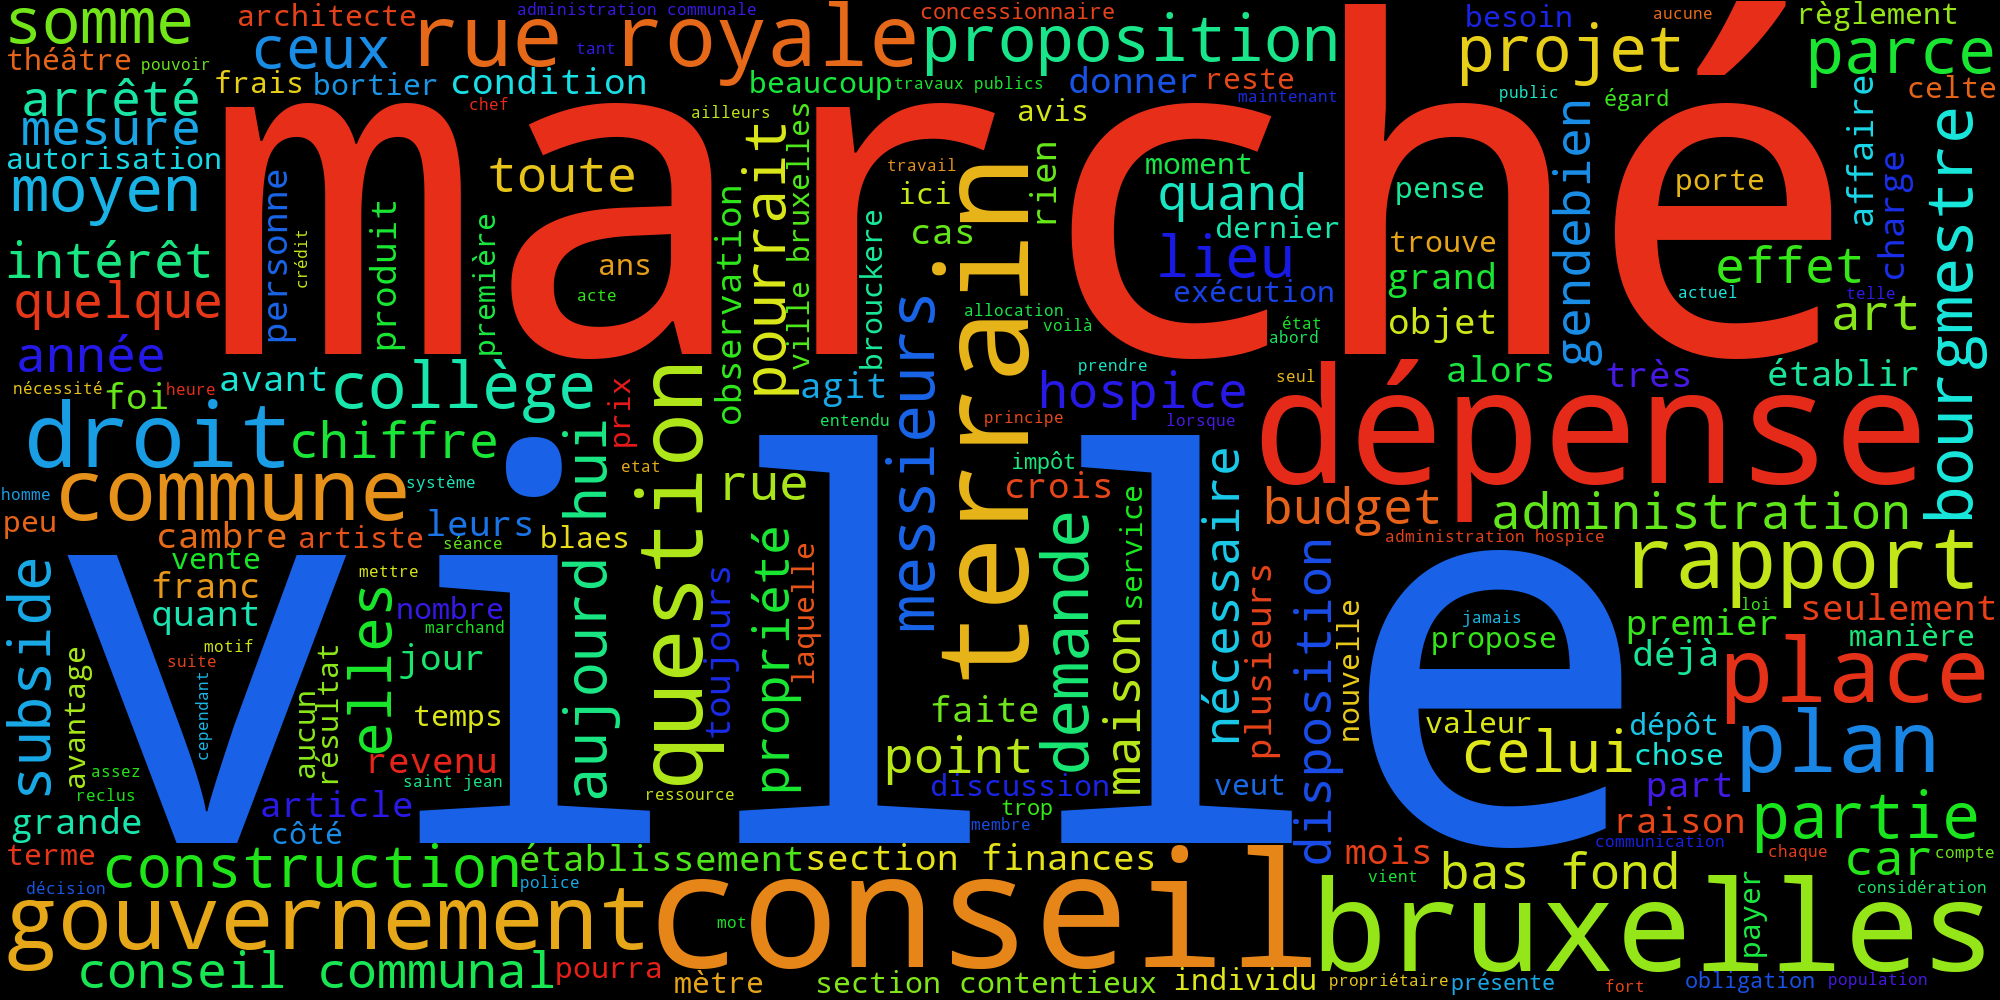

In [6]:
from IPython.display import Image

Image(filename=f'{YEAR}.png')